## Лабораторная работа №1 | Вариант 2

Выполнил: <br>Постнов Леонид Алексеевич<br> М8О-306Б-22

### 1. Numpy

In [2]:
import numpy as np

1. Создайте матрицу размером 8х8 и заполните ее шахматным рисунком

In [3]:
n = 8
arr = np.indices((n, n)).sum(axis=0) % 2 + 1
arr[(arr == 2)] = 0
arr

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

2. Каков результат выполнения следующих выражений?

```python
np.array(0) / np.array(0)
np.array(0) // np.array(0)
np.array([np.nan]).astype(int).astype(float)
```

In [4]:
np.array(0) / np.array(0)
np.array(0) // np.array(0)
np.array([np.nan]).astype(int).astype(float)

/tmp/ipykernel_827/548293649.py:1: RuntimeWarning: invalid value encountered in divide
  np.array(0) / np.array(0)
/tmp/ipykernel_827/548293649.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  np.array(0) // np.array(0)
/tmp/ipykernel_827/548293649.py:3: RuntimeWarning: invalid value encountered in cast
  np.array([np.nan]).astype(int).astype(float)


array([-9.22337204e+18])

3. Создайте матрицу-шахматную доску 8х8 используя функцию `tile`

In [5]:
temp = np.array(([1, 0], [0, 1]))
arr = np.tile(temp, (4, 4))
arr

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

4. Как округлить до целых массив чисел с плавающей точкой?

In [6]:
arr = np.linspace(1, 2, 15)
rounded = np.round(arr, 0)
print(arr, rounded, sep='\n')

[1.         1.07142857 1.14285714 1.21428571 1.28571429 1.35714286
 1.42857143 1.5        1.57142857 1.64285714 1.71428571 1.78571429
 1.85714286 1.92857143 2.        ]
[1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]


5. Как найти общие значения между двумя массивами?

In [7]:
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([1, 2, 9, 4, 25])

np.intersect1d(arr1, arr2)

array([1, 2, 4])

6. Как вычислить ((A+B)*(-A/2)) на месте (без копирования)?

In [8]:
a = np.arange(1, 10, 3)
b = np.arange(10, 1, -3)
((a + b) * (-a / 2))

array([ -5.5, -22. , -38.5])

7. Рассмотрим случайный вектор с формой 100х2, представляющей координаты, и найдем расстояния от точки к точке

In [33]:
arr = np.random.randint(1, 100, (100, 2))
coords = np.diff(arr, axis=0)
coords = coords ** 2
answer = np.sum(coords, axis=1) ** 0.5
print(arr[:2], answer[0], sep='\n')

[[51 83]
 [95 17]]
79.32212806020776


8. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [10]:
arr = np.linspace(0, 1, 10)
arr = arr.astype(np.int32, copy=False)
arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

9. Создайте структурированный массив, представляющий позицию (x, y) и цвет (r, g, b).

In [11]:
pixels = np.array([(2, 15, 'r'), (3, 4, 'g'), (3, 5, 'g'), (9, 6, 'b')], dtype=[('x_pos', 'i4'), ('y_pos', 'i4'), ('color', 'U1')])
pixels

array([(2, 15, 'r'), (3,  4, 'g'), (3,  5, 'g'), (9,  6, 'b')],
      dtype=[('x_pos', '<i4'), ('y_pos', '<i4'), ('color', '<U1')])

10. Какой эквивалент enumerate для numpy массивов?

In [12]:
arr = np.array([1, 0, 1, 0, 4, 5])
for enum in np.ndenumerate(arr):
    print(enum) 

((0,), np.int64(1))
((1,), np.int64(0))
((2,), np.int64(1))
((3,), np.int64(0))
((4,), np.int64(4))
((5,), np.int64(5))


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Данные о преступлениях, совершенных женщинами в Индии, с демографическими подробностями.

Файл: `CrimesOnWomenData.csv`

```
State - название штата/региона
Year - год записи
Rape - случаи изнасилования
K&A - случаи похищения 
DD - смерти из-за приданого
AoW - нападение на женщин
AoM - нападение на женскую скромность(modestity)
DV - бытовое насилие
WT - торговля женщинами
```

In [13]:
import pandas as pd

In [14]:
crimes = pd.read_csv('CrimesOnWomenData.csv')
crimes.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [15]:
crimes['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

2. Выявите район с самым высоким количеством убийств женщин

In [16]:
crimes[(crimes['DD'] == crimes['DD'].max())][['State', 'DD']]

,State,DD
582,Uttar Pradesh,2524


3. Какое среднее число изнасилований женщин в индии наблюдалось в указанные года?

In [17]:
crimes['Rape'].mean()

np.float64(727.8559782608696)

4. Выявите район с минимальным числом похищений за период 2001-2003 года

In [18]:
crimes[(crimes['K&A'] == crimes['K&A'].min()) & (2001 <= crimes['Year']) & (crimes['Year']<= 2003)][['State', 'K&A']].head(1)

,State,K&A
32,LAKSHADWEEP,0


5. Перечислите районы в которых наблюдались наиболее частые случае домашнего насилия за период с 2005 по 2012 года

In [19]:
dom_violence = crimes[(2005 <= crimes['Year']) & (crimes['Year']<= 2012)][['State', 'DV']]
dom_violence.sort_values(by='DV', ascending=False).head(10)

,State,DV
404,West Bengal,19865
368,West Bengal,19772
333,WEST BENGAL,17796
299,WEST BENGAL,16112
265,WEST BENGAL,13663
376,Andhra Pradesh,13389
340,Andhra Pradesh,13376
397,Rajasthan,13312
361,Rajasthan,12218
306,ANDHRA PRADESH,12080


6. Выведите названия районов в порядке не возрастания случаев торговли женщинами за 2020 год

In [20]:
woman_trade = crimes[(crimes['Year'] == 2020)][['State', 'WT']]
woman_trade.sort_values(by='WT', ascending=False)

,State,WT
686,Sikkim,231
674,Jharkhand,159
677,Madhya Pradesh,85
684,Punjab,67
691,Uttarakhand,52
664,Andhra Pradesh,48
670,Gujarat,47
667,Bihar,30
671,Haryana,28
689,Tripura,25


Перейдем к следующему набору данных.

Файл: `CustomerPurchasingBehaviors.csv`

Этот набор данных содержит информацию о профилях клиентов и их покупательском поведении. Данные содержат столбцы, содержащие идентификатор пользователя, возраст, годовой доход, сумму покупки, показатель лояльности (в разбивке по классам), регион и частоту покупок. Он предназначен для анализа тенденций сегментации клиентов и лояльности и может быть использован для различных задач машинного обучения и анализа данных, связанных с поведением клиентов и исследованиями рынка.

```
user_id - ID клиента
age - Возраст
annual_income - Годовой доход клиента (в долларах США).
purchase_amount - Общая сумма покупок, совершенных клиентом (в долларах США).
loyalty_score - Показатель лояльности клиента (значение от 0 до 100).
region - Регион, в котором проживает клиент (Север, Юг, Восток, Запад).
purchase_frequency - Частота покупок клиентов (количество раз в год).
```

In [21]:
customers = pd.read_csv('CustomerPurchasingBehaviors.csv')
customers.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


8. Какой средний годовой доход у клиентов с уровнем лояльности больше 50 живущих на севере

In [22]:
customers[(customers['loyalty_score'] > 5.0) & (customers['region'] == 'North')]['annual_income'].mean()

np.float64(60146.34146341463)

9. Выведите 25 и 75 перцентили уровня лоальности клиентов живущих на западе с частотой покупок более 20 раз в год

In [38]:
customers[(customers['region'] == 'West') & (customers['purchase_frequency'] > 20)]['loyalty_score'].describe()[['25%', '75%']]

25%    8.5
75%    9.2
Name: loyalty_score, dtype: float64

10. Отличается ли медианный возраст клиентов с уровнем лояльности более 70 и менее 10 для жителей Востока и Севера.

In [44]:
print(customers[((customers['region'] == 'North') | (customers['region'] == 'East')) & (customers['loyalty_score'] > 7.0)]['age'].median())
print(customers[((customers['region'] == 'North') | (customers['region'] == 'East')) & (customers['loyalty_score'] < 1.0)]['age'].median())


46.0
nan


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [45]:
import matplotlib.pyplot as plt

1. Постройте диаграмму которая отражает средний уровень лояльности во всех регионах

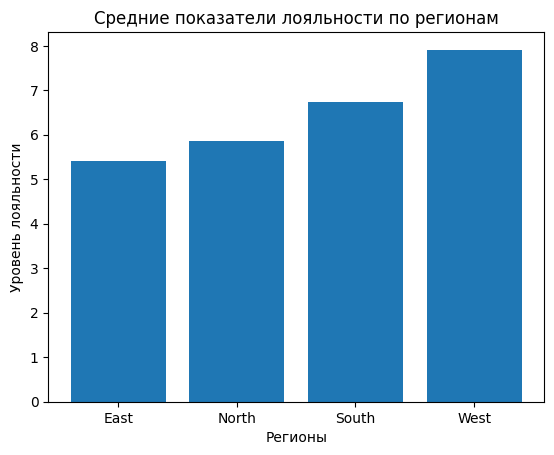

In [90]:
loyalty_means = customers.groupby('region')['loyalty_score'].mean()

plt.bar(loyalty_means.index, loyalty_means.values)
plt.xlabel('Регионы')
plt.ylabel('Уровень лояльности')
plt.title('Средние показатели лояльности по регионам')

plt.show()

2. Постройте гистограмму распределения зарплат клиентов на Севере.

Text(0.5, 1.0, 'Распределение зарплат в северном регионе')

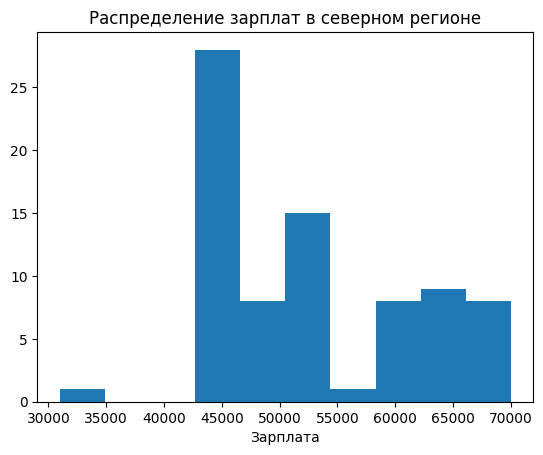

In [51]:
plt.hist(customers[(customers['region'] == 'North')]['annual_income'])
plt.xlabel('Зарплата')
plt.title('Распределение зарплат в северном регионе')

3. Сравните уровни зарплат людей на севере и юге.

Text(0.5, 1.0, 'Сравнение зарплат на севере и юге')

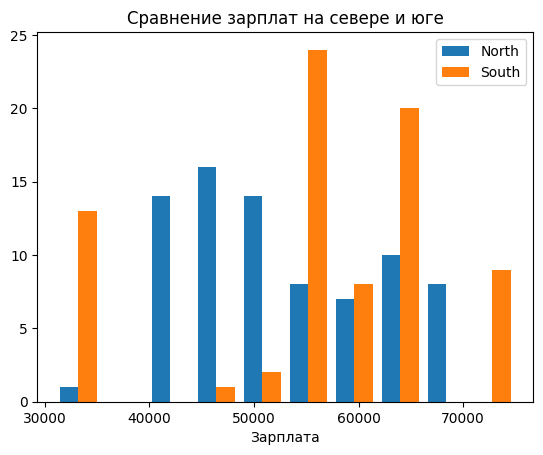

In [57]:
income_in_north = customers[(customers['region'] == 'North')]['annual_income']
income_in_south = customers[(customers['region'] == 'South')]['annual_income']

plt.hist([income_in_north, income_in_south], label=['North', 'South'])
plt.legend()
plt.xlabel('Зарплата')
plt.title('Сравнение зарплат на севере и юге')

4. Постройте box plot отображающий распределение уровня лояльности для людей до 20 лет, от 20 до 40, от 40 до 60 и старше 60 лет

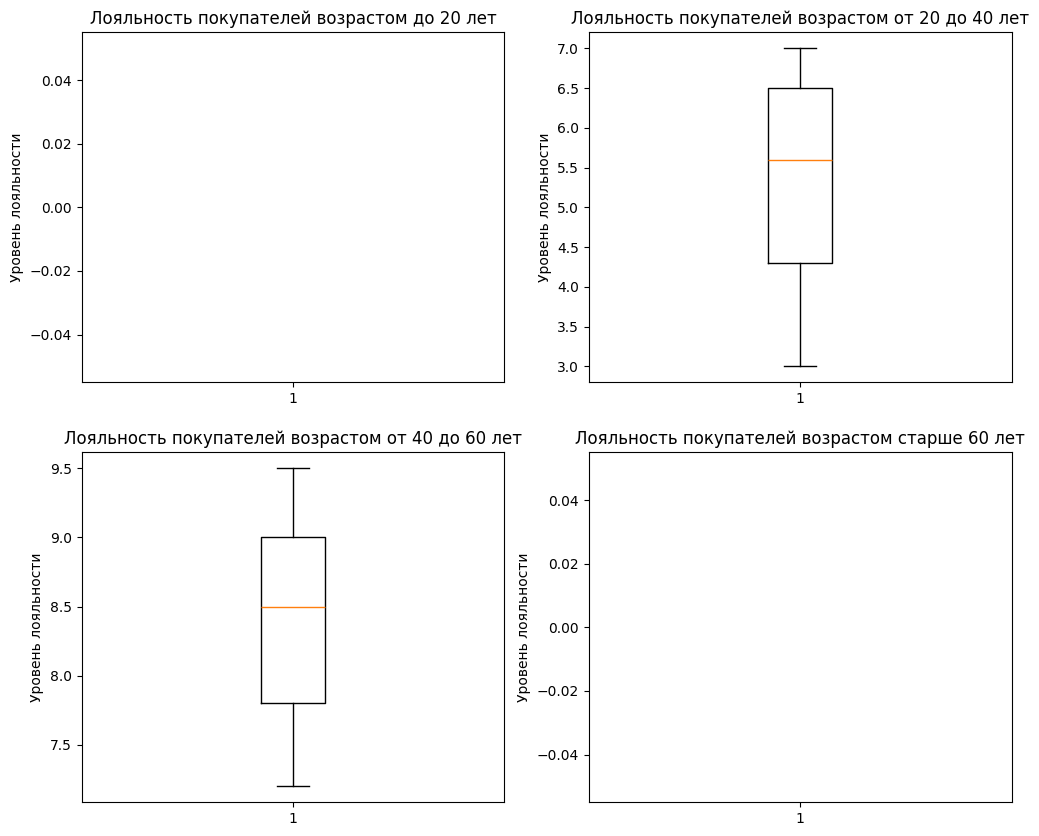

In [80]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10)) 

axs[0, 0].boxplot(customers[customers['age'] < 20]['loyalty_score'])
axs[0, 0].set_title('Лояльность покупателей возрастом до 20 лет')
axs[0, 0].set_ylabel('Уровень лояльности')

axs[0, 1].boxplot(customers[(customers['age'] >= 20) & (customers['age'] < 40)]['loyalty_score'])
axs[0, 1].set_title('Лояльность покупателей возрастом от 20 до 40 лет')
axs[0, 1].set_ylabel('Уровень лояльности')

axs[1, 0].boxplot(customers[(customers['age'] >= 40) & (customers['age'] <= 60)]['loyalty_score'])
axs[1, 0].set_title('Лояльность покупателей возрастом от 40 до 60 лет')
axs[1, 0].set_ylabel('Уровень лояльности')

axs[1, 1].boxplot(customers[customers['age'] > 60]['loyalty_score'])
axs[1, 1].set_title('Лояльность покупателей возрастом старше 60 лет')
axs[1, 1].set_ylabel('Уровень лояльности')

plt.show()

5. Визуализируйте зависимость частоты покупок от заработка

Text(0, 0.5, 'Частота покупок')

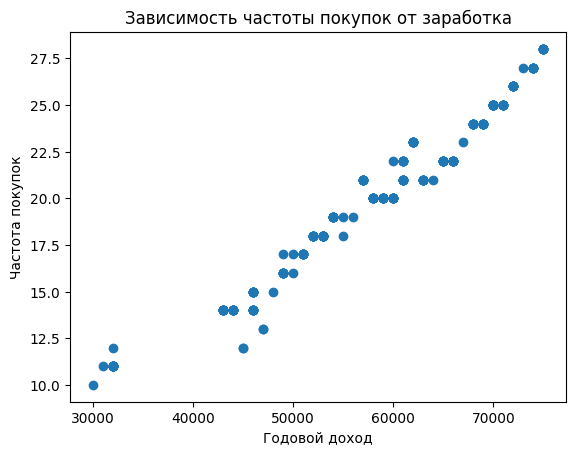

In [58]:
x = customers['annual_income']
y = customers['purchase_frequency']

plt.scatter(x, y)
plt.title('Зависимость частоты покупок от заработка')
plt.xlabel('Годовой доход')
plt.ylabel('Частота покупок')

6. Визуализируйте как зависит сумма покупок от зарплаты клиента

Text(0, 0.5, 'Частота покупок')

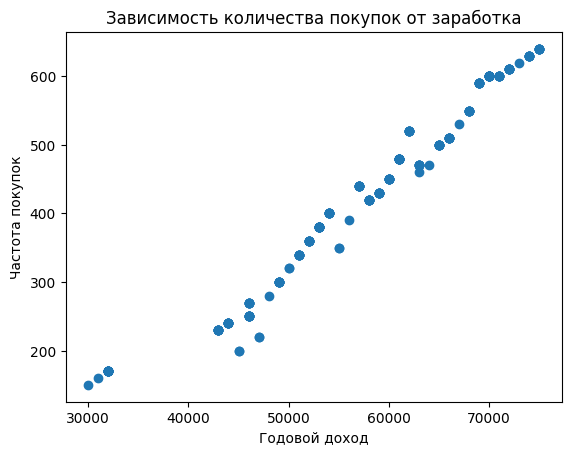

In [59]:
x = customers['annual_income']
y = customers['purchase_amount']

plt.scatter(x, y)
plt.title('Зависимость количества покупок от заработка')
plt.xlabel('Годовой доход')
plt.ylabel('Частота покупок')

7. Придумайте как визуализировать зависимость между частотой покупок, суммой покупок и скором лояльности *

\* Задание на доп. балл

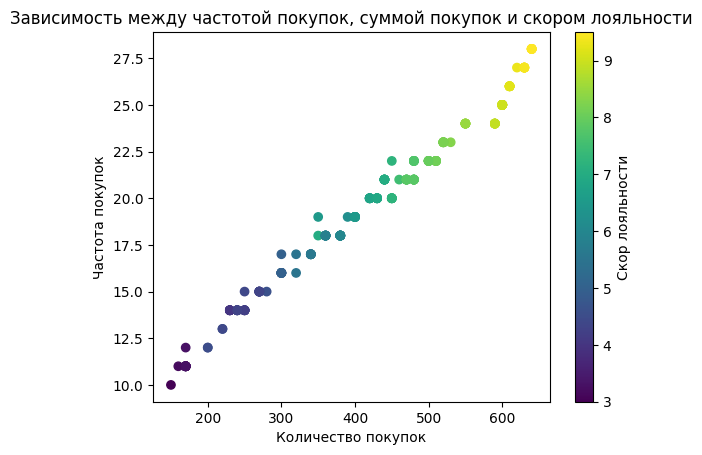

In [85]:
x = customers['purchase_amount']
y = customers['purchase_frequency']
colors = customers['loyalty_score']

plt.scatter(x, y, c=colors, cmap='viridis')
plt.colorbar(label='Скор лояльности')
plt.xlabel('Количество покупок')
plt.ylabel('Частота покупок')
plt.title('Зависимость между частотой покупок, суммой покупок и скором лояльности')

plt.show()